In [1]:
import os

import pandas as pd

def load_data(disturb_type: int, N, dimension, method):
    methods = ["1HOPE", "2LAP", "3LLE", "4DeepWalk", "5MNMF", "6LINE", "7Node2Vec"]
    MEAN = {}
    MU = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
    
    for mu in MU:
        if disturb_type==1:
            folder_name = f"Stoch_{N}_{methods[method-1]}"
            file_name = f"Stoch_{N}_{mu}_{dimension}dim_" + methods[method-1] + "_MEAN.csv"
        elif disturb_type==2:
            folder_name = f"Btwn_{N}_{methods[method-1]}"   
            file_name = f"Btwn_{N}_{mu}_{dimension}dim_" + methods[method-1] + "_MEAN.csv"
        elif disturb_type==3:
            folder_name = f"Trans_{N}_{methods[method-1]}"   
            file_name = f"Trans_{N}_{mu}_{dimension}dim_" + methods[method-1] + "_MEAN.csv"            
        elif disturb_type==4:
            folder_name = f"Deg_{N}_{methods[method-1]}"   
            file_name = f"Deg_{N}_{mu}_{dimension}dim_" + methods[method-1] + "_MEAN.csv"
        elif disturb_type==5:
            folder_name = f"Rank_{N}_{methods[method-1]}"   
            file_name = f"Rank_{N}_{mu}_{dimension}dim_" + methods[method-1] + "_MEAN.csv"
        elif disturb_type==6:
            folder_name = f"Trank_{N}_{methods[method-1]}"   
            file_name = f"Trank_{N}_{mu}_{dimension}dim_" + methods[method-1] + "_MEAN.csv"            
        file_path = os.path.join(folder_name, file_name)
        
        MEAN[mu] = pd.read_csv(file_path, header=None, sep=' ')
        
    return MEAN

In [2]:
# load_data(disturb_type: int, N, dimension, method):

import numpy as np
import matplotlib.pyplot as plt
import numpy as np

def bar_plot(disturb_type: int, N, dimension):
    if disturb_type == 1:
        percent = [0, 4, 8, 12] # 对应了 20% 40% 60%
        percentage = ['0%', '20%', '40%', '60%']
    elif disturb_type == 5:# and N == 1000:
        percent = [0, 2, 4, 6] # 对应了 15% 30% 45%
        percentage = ['0%', '10%', '20%', '30%']
    #elif disturb_type == 5 and N == 10000:
    #    percent = [0, 2, 4, 6] # 对应了 10% 20% 30%
    #    percentage = ['0%', '10%', '20%', '30%']

    MU = [0.01, 0.1, 0.3, 0.5]
    #methods = ["1HOPE", "2LAP", "3LLE", "4DeepWalk", "5MNMF", "6LINE", "7Node2Vec"]
    i_range = [1, 2, 0, 4, 3, 5, 6]
    methods = ["1LE", "2LLE", "3HOPE", "4MNMF", "5DeepWalk", "6LINE", "7Node2Vec"]

    data = []

    for mu in MU:
        temp = []
        for i in i_range:
            temp.append(list(load_data(disturb_type,N,dim,i)[mu][3][percent]))
        data.append(temp)
        
    # 示例数据
    categories = methods  # Replace with actual category names
    subcategories = percentage  # Replace with actual subcategory names

    # 每个subcategory的数据（四组堆叠数据）
    values_group1 = np.array(data[0])
    values_group2 = np.array(data[1])
    values_group3 = np.array(data[2])
    values_group4 = np.array(data[3])

    # 不同堆叠部分的颜色和纹理
    colors = ['skyblue', 'orange', 'lightgreen', 'red']
    hatches = ['.', '*', 'o', '\\']  # 使用点、星号、小圆点、大圆点作为纹理样式
    edge_color = 'black'  # 设置分界线颜色为黑色
    line_width = 3  # 设置分界线的线条宽度

    # 设置图表位置
    fig, ax = plt.subplots(figsize=(10, 6))

    # 每组的位置
    x = np.arange(7)
    total_bars = 4
    width = 0.8 / total_bars  # 每组内每个柱的宽度

    # 绘制柱状图并保存每个部分的柱对象
    bars = []

    for i in range(len(percentage)):
        p1 = ax.bar(x + i*width - width*(total_bars-1)/2, values_group1[:, i], width,
                    color=colors[i], hatch=hatches[0], edgecolor=edge_color, linewidth=line_width)
        p2 = ax.bar(x + i*width - width*(total_bars-1)/2, values_group2[:, i], width,
                    bottom=values_group1[:, i], color=colors[i], hatch=hatches[1], edgecolor=edge_color, linewidth=line_width)
        p3 = ax.bar(x + i*width - width*(total_bars-1)/2, values_group3[:, i], width,
                    bottom=values_group1[:, i] + values_group2[:, i], color=colors[i], hatch=hatches[2], edgecolor=edge_color, linewidth=line_width)
        p4 = ax.bar(x + i*width - width*(total_bars-1)/2, values_group4[:, i], width,
                    bottom=values_group1[:, i] + values_group2[:, i] + values_group3[:, i], color=colors[i], hatch=hatches[3], edgecolor=edge_color, linewidth=line_width)

        bars.append((p1, p2, p3, p4))

    # 手动添加图例项
    legend_labels = ['0.01', '0.1', '0.3', '0.5']  # Update labels as needed

    for idx, hatch in enumerate(hatches):
        plt.bar(0, 0, color='white', edgecolor=edge_color, hatch=hatch, label=f'Hatch: {legend_labels[idx]}', linewidth=line_width)

    for idx, color in enumerate(colors):
        plt.bar(0, 0, color=color, label=f'Color: {subcategories[idx]}')

    # 添加标签和标题
    ax.set_ylabel('ECS')

    # 创建标题，并增加与图表的间距
    if disturb_type ==1:
        disturb_label = 'random'
    elif disturb_type ==5:
        disturb_label = 'targetd'
    ax.set_title(f'Grouped Stacked Bar Chart, {disturb_label}, {N} nodes, {dim}-dim', pad=45)

    # 添加水平图例，放置在标题和图表之间
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13), ncol=4)

    ax.set_xticks(x)
    ax.set_xticklabels(categories)

    plt.show()

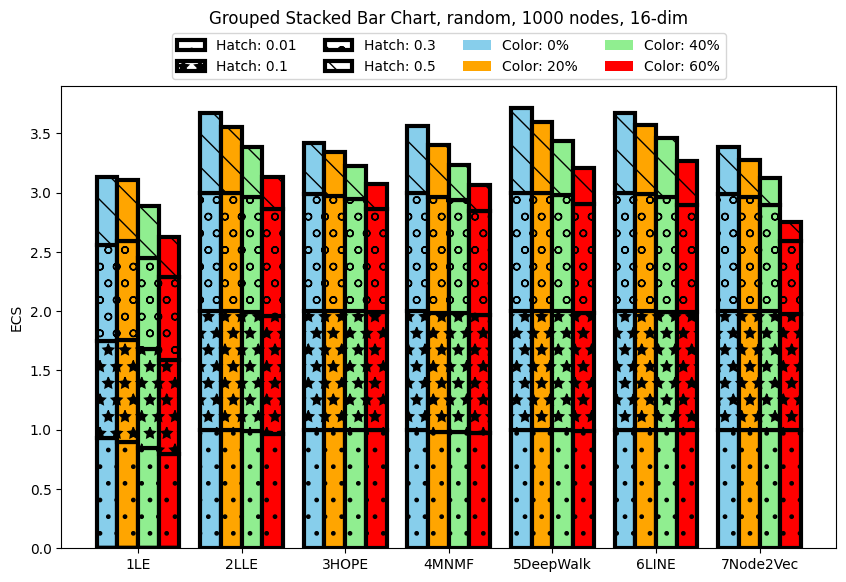

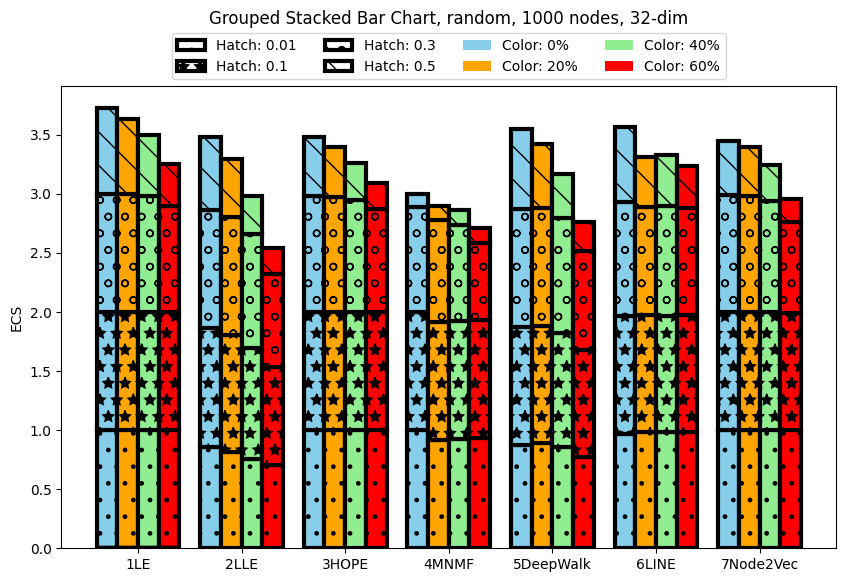

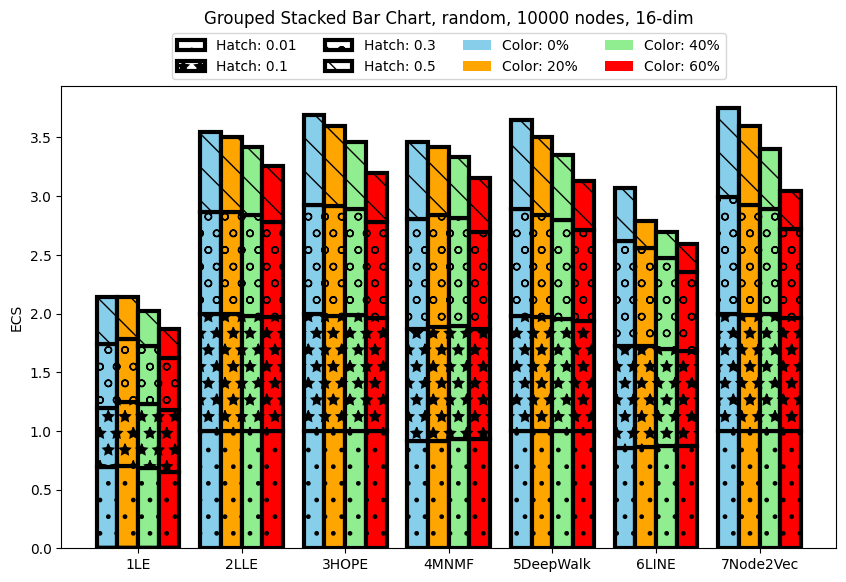

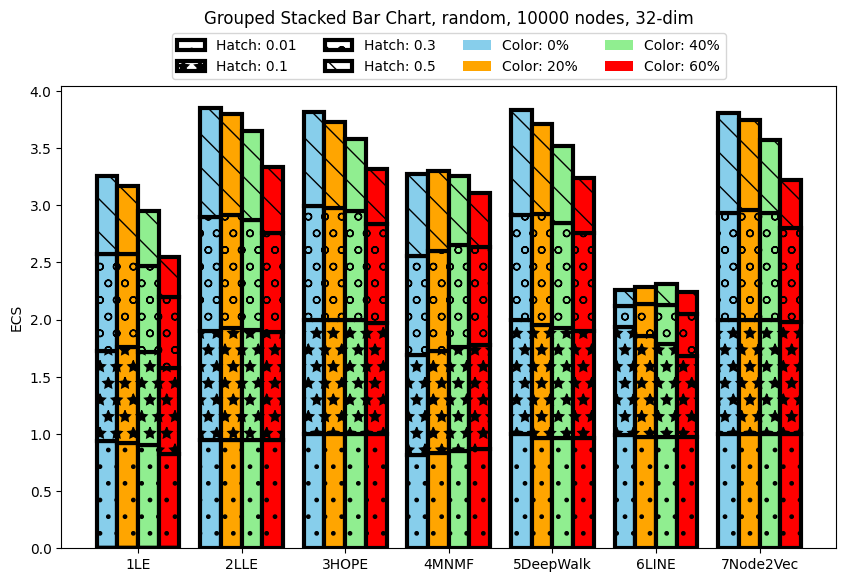

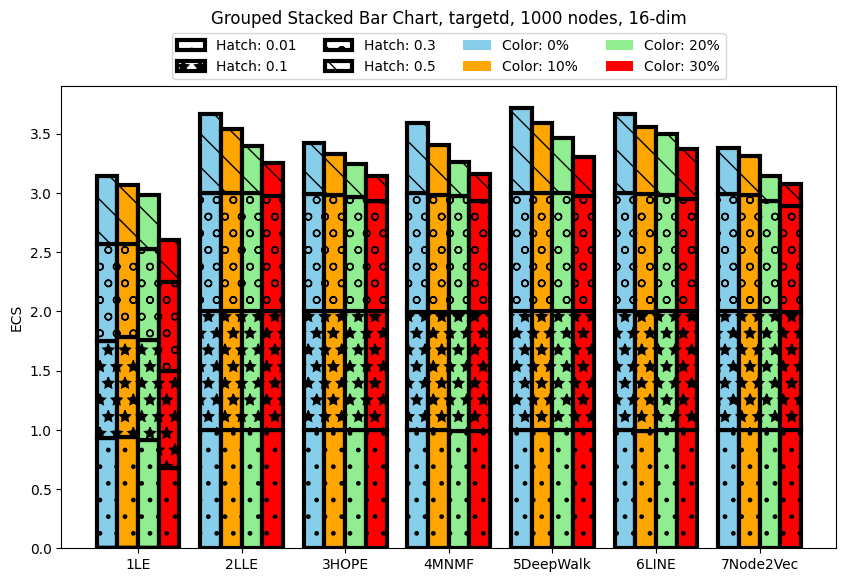

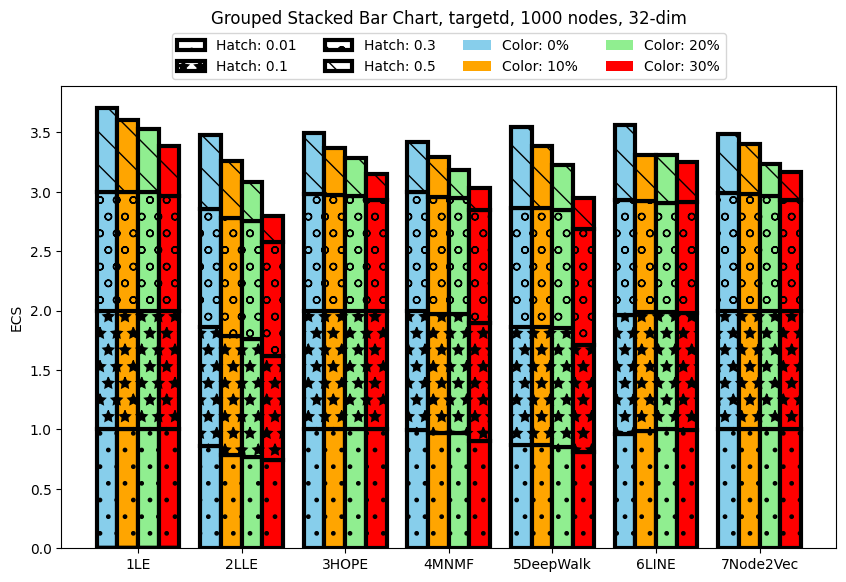

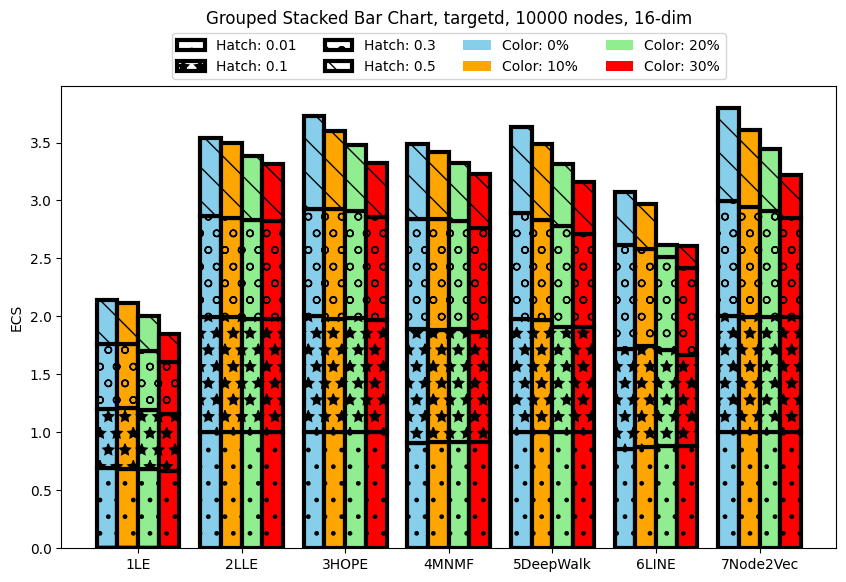

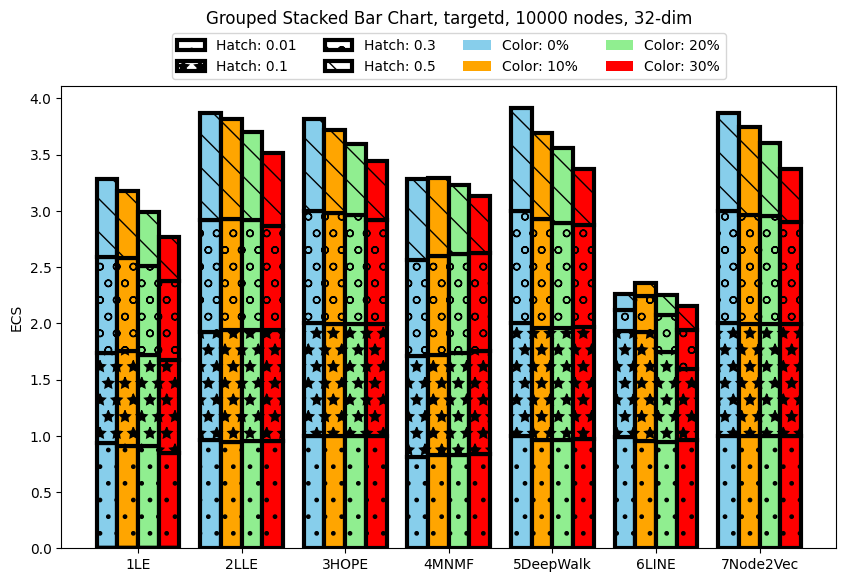

In [3]:
disturb_type = 1
disturb_types = {1, 5}
N = 1000
N_values = {1000, 10000}
dim = 16
dims = {16, 32}

import itertools

for disturb_type, N, dim in itertools.product(disturb_types, N_values, dims):
    bar_plot(disturb_type, N, dim)